In [1]:
from sisyphus.utils.helper_functions import get_create_resultdb

In [2]:
result_db = get_create_resultdb('heas_test_traditional')
results = result_db.load_as_json('4o/4o-mini', '', '', with_doi=True)
results[:5]

e:\anaconda\envs\sisyphus_heas\lib\site-packages\pydantic\main.py:1552: RuntimeWarning: fields may not start with an underscore, ignoring "__tablename__"
  warnings.warn(f'fields may not start with an underscore, ignoring "{f_name}"', RuntimeWarning)


[{'model_name': '4o/4o-mini', 'instruction': '', 'db_name': ''},
 {'composition': 'VCoNi',
  'composition_type': 'atomic',
  'phase': ['fcc'],
  'ys': 1000.0,
  'uts': 1359.0,
  'strain': 38.0,
  'processes': ['induction melting: atmosphere: Ar',
   'homogenized: temperature: 1200 °C, duration: 24 h',
   'cold rolled: reduction: 75%',
   'annealed: temperature: 900 °C, duration: 60 min',
   'quenching: medium: water'],
  'test_type': 'tensile',
  'test_temperature': '25 °C',
  'doi': '10.1002/adma.201807142'},
 {'composition': 'CrCoNi',
  'composition_type': 'atomic',
  'phase': ['fcc'],
  'ys': 460.0,
  'uts': None,
  'strain': None,
  'processes': None,
  'test_type': 'tensile',
  'test_temperature': '25 °C',
  'doi': '10.1002/adma.201807142'},
 {'composition': 'CoCuFeMnNi',
  'composition_type': 'atomic',
  'phase': ['FCC'],
  'ys': 259.4,
  'uts': 580.3,
  'strain': 28.3,
  'processes': ['arc melting: atmosphere: Ar, remelting times: 6',
   'cold rolled: reduction: 90%, temperature

In [3]:
results.pop(0)

{'model_name': '4o/4o-mini', 'instruction': '', 'db_name': ''}

In [4]:
# since below code are designed for atomoic composition, omit the weight composition first.
import re
from pymatgen.core.composition import Composition

def has_parentheses(text):
    return re.search(r'\(.*\)', text) is not None

def extract_outer_parentheses(text):
    unclosed_parenth = 0
    for i, c in enumerate(text):
        if c == '(':
            if unclosed_parenth == 0:
                start = i
            unclosed_parenth += 1
        elif c == ')':
            unclosed_parenth -= 1
            if unclosed_parenth == 0:
                yield text[start:i+1]

def normalize(formula):
    for match in extract_outer_parentheses(formula):
        without_parentheses = match[1:-1]
        multiplier = get_multiplier(match, formula)
        if has_parentheses(without_parentheses):
            without_parentheses = normalize(without_parentheses)
        formatted = formatted_p(without_parentheses, multiplier)
        to_replace = re.compile(re.escape(match) + r'(\d+\.\d+|\d*)')
        formula = re.sub(to_replace, formatted, formula)

    return formula

def get_multiplier(match, formula):
    pattern = re.compile(re.escape(match) + r'(\d+(\.\d+)?)')
    match = pattern.search(formula)
    return float(match.group(1)) if match else 1

def formatted_p(formula, multiplier):
    """formatted composition with multiplier.

    Example:
        formatted_p('CoCrNi', 94) -> Co31.33333333 Cr31.33333333 Ni31.33333333"""
    composition = Composition(formula)
    total = composition.num_atoms
    formatted_comp = Composition({el: num/total*multiplier for el, num in composition.items()})
    return str(formatted_comp)

def norm_2_one(formula):
    comp = Composition(formula)
    total = sum(comp.values())
    return str(Composition({el: round(num/total, 3) for el, num in comp.items()}).alphabetical_formula)

In [5]:
def parse_material(material):
    # parse material to a normalized format (atomic composition)
    split = material.split('-')
    if len(split) != 2: # not doped case
        formula = ''.join(split)
        try:
            c = Composition(formula, strict=True) 
            if c:
                if len(c.elements) < 3:
                    return None
            return norm_2_one(normalize(formula))
        except:
            return None
    return None

In [6]:
results_test = results[:30]
for res in results_test:
    print(res['composition'])
    print(parse_material(res['composition']))

VCoNi
Co0.333 Ni0.333 V0.333
CrCoNi
Co0.333 Cr0.333 Ni0.333
CoCuFeMnNi
Co0.2 Cu0.2 Fe0.2 Mn0.2 Ni0.2
CoCuFeMnNi
Co0.2 Cu0.2 Fe0.2 Mn0.2 Ni0.2
Co19.90Cr20.00Fe19.90Mn21.30Ni18.90C0.00
Co0.199 Cr0.2 Fe0.199 Mn0.213 Ni0.189
Co19.90Cr19.75Fe19.80Mn21.20Ni18.80C0.55
C0.006 Co0.199 Cr0.198 Fe0.198 Mn0.212 Ni0.188
Co19.70Cr19.70Fe19.70Mn21.07Ni18.80C1.03
C0.01 Co0.197 Cr0.197 Fe0.197 Mn0.211 Ni0.188
Fe42.26Ni27.5Co17.5Al10.5Ta2.2B0.04
Al0.105 Co0.175 Fe0.423 Ni0.275 Ta0.022
Fe42.26Ni27.5Co17.5Al10.5Ta2.2B0.04
Al0.105 Co0.175 Fe0.423 Ni0.275 Ta0.022
Fe42.26Ni27.5Co17.5Al10.5Ta2.2B0.04
Al0.105 Co0.175 Fe0.423 Ni0.275 Ta0.022
Co20Cr20Fe20Ni20Mn10Si10
Co0.2 Cr0.2 Fe0.2 Mn0.1 Ni0.2 Si0.1
Co22Cr22Fe22Ni22Si12
Co0.22 Cr0.22 Fe0.22 Ni0.22 Si0.12
CoCrFeMnNi
Co0.2 Cr0.2 Fe0.2 Mn0.2 Ni0.2
Co30Cr20Fe18Ni14Mn18
Co0.3 Cr0.2 Fe0.18 Mn0.18 Ni0.14
Co30Cr20Fe18Ni14Mn18
Co0.3 Cr0.2 Fe0.18 Mn0.18 Ni0.14
Co30Cr20Fe18Ni14Mn18
Co0.3 Cr0.2 Fe0.18 Mn0.18 Ni0.14
TiZrHfNb0.4
Hf0.294 Nb0.118 Ti0.294 Zr0.294
TiZrHfNb
Hf0

In [7]:
fcc = re.compile(r'a1|fcc|f\.c\.c|face(\s-)?centered cubic|𝛾(?!\')', re.IGNORECASE)
bcc = re.compile(r'a2|bcc|b\.c\.c|body(\s-)?centered cubic|𝛽', re.IGNORECASE)
hcp = re.compile(r'hcp|h\.c\.p|hexagonal(\s-)?close packed', re.IGNORECASE)
order = re.compile(r'order|ordered', re.IGNORECASE)
amorphous = re.compile(r'amorphous', re.IGNORECASE)

def formatted_phase(phase):
    if amorphous.search(phase):
        return 'amorphous'
    if fcc.search(phase):
        if order.search(phase):
            return 'others'
        return 'fcc'
    if bcc.search(phase):
        if order.search(phase):
            return 'others'
        return 'bcc'
    if hcp.search(phase):
        return 'hcp'
    return 'others'   

In [8]:
import pandas as pd

df = pd.DataFrame(results_test)

In [9]:
def clean_phase(row):
    if not row.phase:
        return None
    return [formatted_phase(p) for p in row.phase]

df['phase_cleaned'] = df.apply(clean_phase, axis=1)

In [10]:
def classify(row):
    phases = row.phase_cleaned
    if not phases:
        return 'unknown'
    is_ss = False
    is_im = False
    if 'amorphous' in phases:
        return 'amorphous'
    if 'fcc' in phases:
        is_ss = True
    if 'bcc' in phases:
        is_ss = True
    if 'hcp' in phases:
        is_ss = True
    if 'others' in phases:
        is_im = True
    if is_ss and is_im:
        return 'ss+im'
    if is_ss:
        return 'ss'
    if is_im:
        return 'im'

df['classification'] = df.apply(classify, axis=1)

In [11]:
df = pd.DataFrame(results)
df['phase_cleaned'] = df.apply(clean_phase, axis=1)
df['classification'] = df.apply(classify, axis=1)

In [12]:
df.classification.value_counts()

classification
ss           2898
ss+im        1583
unknown      1046
im            308
amorphous      80
Name: count, dtype: int64

In [13]:
df['composition_cleaned'] = df.composition.apply(parse_material)

In [14]:
df.composition_cleaned.value_counts()

composition_cleaned
Co0.2 Cr0.2 Fe0.2 Mn0.2 Ni0.2                    545
Al0.164 Co0.164 Cr0.164 Fe0.164 Ni0.344          173
Co0.25 Cr0.25 Fe0.25 Ni0.25                      160
Al0.07 Co0.233 Cr0.233 Fe0.233 Ni0.233           111
Al0.2 Co0.2 Cr0.2 Fe0.2 Ni0.2                     72
                                                ... 
C0.048 Hf0.238 Nb0.238 Ti0.238 V0.238              1
C0.024 Hf0.244 Nb0.244 Ti0.244 V0.244              1
Hf0.25 Nb0.25 Ti0.25 V0.25                         1
Co0.17 Cr0.203 Fe0.204 Mn0.204 N0.016 Ni0.203      1
Cu0.317 Mn0.317 Ni0.317 Sn0.05                     1
Name: count, Length: 1987, dtype: int64

In [20]:
# data cleaning
# we need to remove those conflict ones (same composition but different phase classification)
df_ss_im = df[df.classification.isin(['ss', 'im', 'ss+im']) & df.composition_type.str.contains('atomic')]
def has_conflict_phase(phases):
    """return True if there are conflict phases"""
    s = set()
    for p in phases:
        s.add(p)
    if len(s) > 1:
        return True
    return False

dic_ls = []
for k, group in df_ss_im.groupby('composition_cleaned'):
    phase_list = []
    for i, row in group.iterrows():
        phase_list.append(row.classification)
    if not has_conflict_phase(phase_list):
        dic_ls.append(group.iloc[0][['composition_cleaned', 'classification']].to_dict())

df_cls = pd.DataFrame(dic_ls)

In [21]:
df_cls.to_csv('phase_cls_ss_im.csv', index=False)

In [13]:
from enum import Enum

class Fabrications(Enum):
    POWDER_METALLURGY = 'powder metallurgy'
    MELTING_CASTING = 'melting casting'
    ADDITIVE_MANUFACTURING = 'additive manufacturing'
    DEPOSITION = 'deposition'
    OTHER = 'other'


In [14]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from typing import Literal

template = ChatPromptTemplate([
    ('system', 'You are an expert in HEAs (high entropy alloys) domain. You are given with a fabrication method and your job is to classify it into one of the following categories: powder metallurgy, melting casting, additive manufacturing, deposition, or other. Please provide the classification and a brief explanation of your reasoning.'),
])
import dspy
lm = dspy.LM('gpt-4o', cache=True)
dspy.configure(lm=lm)

class Classify(dspy.Signature):
    """Classify the fabrication method of HEAs (high entropy alloys) to the predefined categories."""
    fabrication: str = dspy.InputField(description='The fabrication method of the HEA.') 
    category: Literal['melting casting', 'powder metallurgy', 'additive manufacturing', 'deposition', 'other'] = dspy.OutputField(description='The category of the fabrication method. Answer other if you are not sure.')

cot_cls = dspy.ChainOfThought(Classify)

In [15]:
import re

def normalize_fabri(fabrication):
    if not fabrication:
        return None
    pattern = re.compile(r'((vacuum)?(\s|-)+)?(arc|inductive|induction)(\s|-)+(melting)')
    if pattern.search(fabrication):
        return Fabrications.MELTING_CASTING.value
    category = cot_cls(fabrication=fabrication).category
    return category
    
def get_specified_thermo_mech(thermal_mechanical_processings):
    d = dict.fromkeys(['annealed', 'rolled', 'homogenized', 'aged'], False)
    if not thermal_mechanical_processings:
        return d
    anneal_p = re.compile(r'anneal')
    roll_p = re.compile(r'roll')
    homogenize_p = re.compile(r'homogenize')
    age_p = re.compile(r'(age|aging)')
    for process in thermal_mechanical_processings.split('|'):
        if anneal_p.search(process):
            d['annealed'] = True
        if roll_p.search(process):
            d['rolled'] = True
        if homogenize_p.search(process):
            d['homogenized'] = True
        if age_p.search(process):
            d['aged'] = True
    return d

In [16]:

def post_process(result: dict):
    processed_comp = parse_material(result['composition'])
    if not processed_comp:
        return None
    processed_fabri = normalize_fabri(result['fabrication'])
    d = get_specified_thermo_mech(result['thermal_mechanical_processings'])
    expanded_result = dict(
        composition=result['composition'],
        composition_cleaned=processed_comp,
        phase=result['phase'],
        ys=result['ys'],
        uts=result['uts'],
        strain=result['strain'],
        fabrication=result['fabrication'],
        fabrication_cleaned=processed_fabri,
        thermal_mechanical_processings=result['thermal_mechanical_processings'],
        annealed=d['annealed'],
        rolled=d['rolled'],
        homogenized=d['homogenized'],
        aged=d['aged'],
        test_type=result['test_type'],
        test_temperature=result['test_temperature'],
        doi=result['doi']
    )
    return expanded_result

In [23]:
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

def batch_process(results, batch_size):
    expanded_results = []
    def yield_batch():
        for i in range(0, len(results), batch_size):
            yield results[i:i+batch_size]
    for batch in yield_batch():
        with ThreadPoolExecutor(max_workers=batch_size) as executor:
            for res in tqdm(executor.map(post_process, batch), total=len(batch)):
                expanded_results.append(res)
    return expanded_results

expanded_results = batch_process(results, 50)

100%|██████████| 47/47 [00:03<00:00, 13.46it/s]


In [24]:
expanded_results_filtered = [res for res in expanded_results if res]

In [25]:
len([res for res in expanded_results_filtered if res['fabrication_cleaned'] == Fabrications.MELTING_CASTING.value])

3474

In [33]:
import json
with open('heas_1567_dist_expanded.json', 'w', encoding='utf-8') as f:
    json.dump(expanded_results_filtered, f, ensure_ascii=False, indent=2)

In [26]:
import pandas as pd
df = pd.DataFrame(expanded_results_filtered)

In [27]:
df

,composition,composition_cleaned,phase,ys,uts,strain,fabrication,fabrication_cleaned,thermal_mechanical_processings,annealed,rolled,homogenized,aged,test_type,test_temperature,doi
0,CoCrFeMnNi,Co1 Cr1 Fe1 Mn1 Ni1,FCC,NaN,NaN,NaN,None,None,None,False,False,False,False,tensile,25 °C,10.1002/adem.202001514
1,CoCrFeNi,Co1 Cr1 Fe1 Ni1,FCC,NaN,NaN,NaN,None,None,None,False,False,False,False,tensile,25 °C,10.1002/adem.202001514
2,Ti65(AlCrNb)35,Al0.17948718 Cr0.17948718 Nb0.17948718 Ti1,BCC,NaN,NaN,NaN,arc melting,melting casting,None,False,False,False,False,compressive,25 °C,10.1002/adem.202001514
3,Fe40Mn40Co10Cr10,Co0.25 Cr0.25 Fe1 Mn1,None,NaN,NaN,NaN,vacuum induction melting,melting casting,cold rolled to 70% reduction | homogenized at ...,False,True,True,False,tensile,25 °C,10.1002/adem.201801266
4,Al0.1Cr0.4CuFe0.4MnNi,Al0.1 Cr0.4 Cu1 Fe0.4 Mn1 Ni1,"FCC, BCC",NaN,600.0,30.0,vacuum arc-melting,melting casting,None,False,False,False,False,tensile,25 °C,10.1002/adem.201600726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,Fe50Mn30Co10Cr10,Co0.2 Cr0.2 Fe1 Mn0.6,"FCC, HCP",NaN,NaN,65.0,vacuum induction melting,melting casting,annealed at 900 °C | water quenched,True,False,False,False,tensile,25 °C,10.1016/j.scriptamat.2017.09.013
4808,Fe50Mn30Co10Cr10,Co0.2 Cr0.2 Fe1 Mn0.6,"FCC, HCP",NaN,NaN,NaN,vacuum induction melting,melting casting,annealed at 850 °C for 20 min | furnace cooled,True,False,False,False,tensile,25 °C,10.1016/j.scriptamat.2017.09.013
4809,Al0.3CoFeNi,Al0.3 Co1 Fe1 Ni1,"FCC, L12, BCC, B2",1074.0,1302.0,8.0,arc melting,melting casting,homogenized at 1250 °C for 30 min | cold rolle...,True,True,True,False,tensile,25 °C,10.1038/s41598-020-61538-6
4810,Al0.3CoFeNi,Al0.3 Co1 Fe1 Ni1,FCC,457.0,852.0,76.0,arc melting,melting casting,homogenized at 1250 °C for 30 min | cold rolle...,False,True,True,False,tensile,25 °C,10.1038/s41598-020-61538-6


In [28]:
cast_df = df[df['fabrication_cleaned'] == 'melting casting']

In [29]:
cast_df

,composition,composition_cleaned,phase,ys,uts,strain,fabrication,fabrication_cleaned,thermal_mechanical_processings,annealed,rolled,homogenized,aged,test_type,test_temperature,doi
2,Ti65(AlCrNb)35,Al0.17948718 Cr0.17948718 Nb0.17948718 Ti1,BCC,NaN,NaN,NaN,arc melting,melting casting,None,False,False,False,False,compressive,25 °C,10.1002/adem.202001514
3,Fe40Mn40Co10Cr10,Co0.25 Cr0.25 Fe1 Mn1,None,NaN,NaN,NaN,vacuum induction melting,melting casting,cold rolled to 70% reduction | homogenized at ...,False,True,True,False,tensile,25 °C,10.1002/adem.201801266
4,Al0.1Cr0.4CuFe0.4MnNi,Al0.1 Cr0.4 Cu1 Fe0.4 Mn1 Ni1,"FCC, BCC",NaN,600.0,30.0,vacuum arc-melting,melting casting,None,False,False,False,False,tensile,25 °C,10.1002/adem.201600726
5,Al0.2Cr0.4CuFe0.4MnNi,Al0.2 Cr0.4 Cu1 Fe0.4 Mn1 Ni1,"FCC, BCC",NaN,600.0,30.0,vacuum arc-melting,melting casting,None,False,False,False,False,tensile,25 °C,10.1002/adem.201600726
6,MnFeCoNiCu,Co1 Cu1 Fe1 Mn1 Ni1,FCC,361.0,628.0,32.0,vacuum induction melting,melting casting,None,False,False,False,False,tensile,25 °C,10.1002/adem.202000848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,Fe50Mn30Co10Cr10,Co0.2 Cr0.2 Fe1 Mn0.6,"FCC, HCP",NaN,NaN,65.0,vacuum induction melting,melting casting,annealed at 900 °C | water quenched,True,False,False,False,tensile,25 °C,10.1016/j.scriptamat.2017.09.013
4808,Fe50Mn30Co10Cr10,Co0.2 Cr0.2 Fe1 Mn0.6,"FCC, HCP",NaN,NaN,NaN,vacuum induction melting,melting casting,annealed at 850 °C for 20 min | furnace cooled,True,False,False,False,tensile,25 °C,10.1016/j.scriptamat.2017.09.013
4809,Al0.3CoFeNi,Al0.3 Co1 Fe1 Ni1,"FCC, L12, BCC, B2",1074.0,1302.0,8.0,arc melting,melting casting,homogenized at 1250 °C for 30 min | cold rolle...,True,True,True,False,tensile,25 °C,10.1038/s41598-020-61538-6
4810,Al0.3CoFeNi,Al0.3 Co1 Fe1 Ni1,FCC,457.0,852.0,76.0,arc melting,melting casting,homogenized at 1250 °C for 30 min | cold rolle...,False,True,True,False,tensile,25 °C,10.1038/s41598-020-61538-6


In [30]:
df.ys.sort_values(ascending=False)[:10]

1936    45009.0
1935    40672.0
4493    12018.0
4494    11756.0
4496     8610.0
4495     6011.0
1942     2954.0
1890     2710.0
3733     2650.0
2179     2644.0
Name: ys, dtype: float64

In [32]:
df[df.ys < 3000].sort_values('ys', ascending=False)[:20]

,composition,composition_cleaned,phase,ys,uts,strain,fabrication,fabrication_cleaned,thermal_mechanical_processings,annealed,rolled,homogenized,aged,test_type,test_temperature,doi
1942,CoCrFeNi,Co1 Cr1 Fe1 Ni1,FCC,2954.0,NaN,NaN,pulsed DC magnetron sputtering,deposition,None,False,False,False,False,compressive,25 °C,10.1016/j.surfcoat.2022.128191
1890,CoCrFeNi,Co1 Cr1 Fe1 Ni1,"FCC, BCC",2710.0,2810.0,4.00,powder metallurgy,powder metallurgy,high-pressure torsion at 5 GPa for four turns ...,True,False,False,False,tensile,-248 °C,10.1016/j.scriptamat.2022.114631
3733,Co0.5FeNiCrTi0.5,Co0.5 Cr1 Fe1 Ni1 Ti0.5,"FCC, sigma",2650.0,2690.0,10.00,mechanical alloying and spark plasma sintering,powder metallurgy,consolidated at 1273K for 8min at 30MPa,False,False,False,False,compressive,25 °C,10.1016/j.matdes.2012.08.048
2179,CoFeNiVTi0.5,Co1 Fe1 Ni1 Ti0.5 V1,"BCC, (Ni, Co)3Ti",2644.0,NaN,2.30,vacuum arc-melting,melting casting,None,False,False,False,False,compressive,25 °C,10.1007/s11665-023-08963-6
3532,Co34.25Cr15Ni24Fe15Al5Ti3W1.5Mo1.5Nb0.75,Al0.1459854 Co1 Cr0.4379562 Fe0.4379562 Mo0.04...,"FCC, LI2-γ′",2480.0,NaN,3.50,arc-melting,melting casting,homogenized at 1200 °C for 24 h | cold-rolled ...,True,True,True,True,tensile,25 °C,10.1016/j.jmst.2023.08.032
1232,AlCoCrFeNiNb0.5,Al1 Co1 Cr1 Fe1 Nb0.5 Ni1,Multiphase,2473.0,3170.0,NaN,Arc melting,melting casting,None,False,False,False,False,compressive,25 °C,10.1016/j.matchemphys.2024.130091
240,Fe60Co25Ni10Mo5,Co0.41666667 Fe1 Mo0.08333333 Ni0.16666667,BCC,2412.0,2507.0,2.30,vacuum induction melting,melting casting,homogenized at 1100 °C for 6 h | hot rolled at...,False,True,True,True,tensile,25 °C,10.1016/j.actamat.2023.118810
576,NiCrCoV,Co1 Cr1 Ni1 V1,"BCC, FCC",2390.0,2690.0,2.50,laser cladding,deposition,None,False,False,False,False,tensile,25 °C,10.1016/j.jallcom.2017.09.233
2520,Mo0.5VNbTiCr2,Cr1 Mo0.25 Nb0.5 Ti0.5 V0.5,None,2311.0,NaN,NaN,None,None,None,False,False,False,False,compressive,25 °C,10.1016/j.apmt.2024.102164
2504,ZrNbHfTa,Hf1 Nb1 Ta1 Zr1,None,2310.0,NaN,NaN,None,None,None,False,False,False,False,tensile,25 °C,10.1016/j.apmt.2024.102164


In [34]:
fcc_ys_values = df[(df['phase'] == 'FCC') & (df['ys'].notnull())]['ys']
fcc_ys_average = fcc_ys_values.mean()
fcc_ys_average

551.2571544794188

In [35]:
bcc_ys_values = df[(df['phase'] == 'BCC') & (df['ys'].notnull())]['ys']
bcc_ys_average = bcc_ys_values.mean()
bcc_ys_average

940.1870748299319

In [36]:
melting_casting_annealed_ys_values = df[(df['fabrication_cleaned'] == Fabrications.MELTING_CASTING.value) & (df['annealed'] == True) & (df['ys'].notnull())]['ys']
melting_casting_annealed_ys_average = melting_casting_annealed_ys_values.mean()
melting_casting_annealed_ys_average

708.782990660793

In [37]:
melting_casting_annealed_ys_values = df[(df['fabrication_cleaned'] == Fabrications.MELTING_CASTING.value) & (df['annealed'] == False) & (df['ys'].notnull())]['ys']
melting_casting_annealed_ys_average = melting_casting_annealed_ys_values.mean()
melting_casting_annealed_ys_average

689.4307995154452

In [38]:
melting_casting_annealed_ys_values = df[(df['fabrication_cleaned'] == Fabrications.MELTING_CASTING.value) & (df['rolled'] == True) & (df['ys'].notnull())]['ys']
melting_casting_annealed_ys_average = melting_casting_annealed_ys_values.mean()
melting_casting_annealed_ys_average

739.5722196138996

In [39]:
melting_casting_annealed_ys_values = df[(df['fabrication_cleaned'] == Fabrications.MELTING_CASTING.value) & (df['rolled'] == False) & (df['ys'].notnull())]['ys']
melting_casting_annealed_ys_average = melting_casting_annealed_ys_values.mean()
melting_casting_annealed_ys_average

660.6122870556673

In [47]:
melting_casting_annealed_ys_values = df[(df['fabrication_cleaned'] == Fabrications.MELTING_CASTING.value) & (df['aged'] == True) & (df['ys'].notnull())]['ys']
melting_casting_annealed_ys_average = melting_casting_annealed_ys_values.mean()
melting_casting_annealed_ys_average

796.0444224422442

In [49]:
melting_casting_annealed_ys_values = df[(df['fabrication_cleaned'] == Fabrications.MELTING_CASTING.value) & (df['aged'] == False) & (df['ys'].notnull())]['ys']
melting_casting_annealed_ys_average = melting_casting_annealed_ys_values.mean()
melting_casting_annealed_ys_average

685.2668080547725

In [42]:
melting_casting_annealed_ys_values = df[(df['fabrication_cleaned'] == Fabrications.MELTING_CASTING.value) & (df['homogenized'] == True) & (df['ys'].notnull())]['ys']
melting_casting_annealed_ys_average = melting_casting_annealed_ys_values.mean()
melting_casting_annealed_ys_average

699.882546835443

In [43]:
melting_casting_annealed_ys_values = df[(df['fabrication_cleaned'] == Fabrications.MELTING_CASTING.value) & (df['homogenized'] == False) & (df['ys'].notnull())]['ys']
melting_casting_annealed_ys_average = melting_casting_annealed_ys_values.mean()
melting_casting_annealed_ys_average

695.9903645266594

In [50]:
df[df['phase'] == 'FCC']

,composition,composition_cleaned,phase,ys,uts,strain,fabrication,fabrication_cleaned,thermal_mechanical_processings,annealed,rolled,homogenized,aged,test_type,test_temperature,doi
0,CoCrFeMnNi,Co1 Cr1 Fe1 Mn1 Ni1,FCC,NaN,NaN,NaN,None,None,None,False,False,False,False,tensile,25 °C,10.1002/adem.202001514
1,CoCrFeNi,Co1 Cr1 Fe1 Ni1,FCC,NaN,NaN,NaN,None,None,None,False,False,False,False,tensile,25 °C,10.1002/adem.202001514
6,MnFeCoNiCu,Co1 Cu1 Fe1 Mn1 Ni1,FCC,361.0,628.0,32.0,vacuum induction melting,melting casting,None,False,False,False,False,tensile,25 °C,10.1002/adem.202000848
7,MnFeNiCu,Cu1 Fe1 Mn1 Ni1,FCC,401.0,NaN,NaN,vacuum induction melting,melting casting,None,False,False,False,False,tensile,25 °C,10.1002/adem.202000848
8,MnCoNiCu,Co1 Cu1 Mn1 Ni1,FCC,NaN,NaN,47.0,vacuum induction melting,melting casting,None,False,False,False,False,tensile,25 °C,10.1002/adem.202000848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4762,CrMnFeCoNi,Co1 Cr1 Fe1 Mn1 Ni1,FCC,NaN,NaN,NaN,arc-melting,melting casting,None,False,False,False,False,tensile,25 °C,10.1038/s41586-019-1617-1
4763,CrFeCoNiPd,Co1 Cr1 Fe1 Ni1 Pd1,FCC,NaN,NaN,NaN,arc-melting,melting casting,homogenized at 1200 °C for 24 h | recrystalliz...,False,False,True,False,tensile,25 °C,10.1038/s41586-019-1617-1
4769,Al0.5Cr0.9FeNi2.5V0.2,Al0.2 Cr0.36 Fe0.4 Ni1 V0.08,FCC,274.0,NaN,NaN,vacuum arc-melting,melting casting,solution-treated at 1200 °C for 24 h | water q...,False,False,False,False,tensile,25 °C,10.1038/s41467-018-06600-8
4804,Al0.1CoCrFeNi,Al0.1 Co1 Cr1 Fe1 Ni1,FCC,243.9,687.3,57.0,spark plasma sintering,powder metallurgy,None,False,False,False,False,tensile,25 °C,10.1039/d4ra03892d


In [51]:
df[df['phase'] == 'BCC']

,composition,composition_cleaned,phase,ys,uts,strain,fabrication,fabrication_cleaned,thermal_mechanical_processings,annealed,rolled,homogenized,aged,test_type,test_temperature,doi
2,Ti65(AlCrNb)35,Al0.17948718 Cr0.17948718 Nb0.17948718 Ti1,BCC,NaN,NaN,NaN,arc melting,melting casting,None,False,False,False,False,compressive,25 °C,10.1002/adem.202001514
75,AlCoCrFeNi,Al1 Co1 Cr1 Fe1 Ni1,BCC,NaN,204.0,4.9,stir casting,melting casting,extruded at 713 °C | annealed at 713 °C for 1 ...,True,True,False,False,tensile,25 °C,10.1007/s11661-023-07012-0
76,AlCoCrFeNi,Al1 Co1 Cr1 Fe1 Ni1,BCC,NaN,251.0,NaN,stir casting,melting casting,extruded at 713 °C | annealed at 713 °C for 1 ...,True,True,False,False,tensile,-100 °C,10.1007/s11661-023-07012-0
77,AlCoCrFeNi,Al1 Co1 Cr1 Fe1 Ni1,BCC,NaN,263.0,NaN,stir casting,melting casting,extruded at 713 °C | annealed at 713 °C for 1 ...,True,True,False,False,tensile,-100 °C,10.1007/s11661-023-07012-0
163,Ti1.5ZrVNb,Nb0.66666667 Ti1 V0.66666667 Zr0.66666667,BCC,NaN,NaN,12.3,None,None,None,False,False,False,False,tensile,25 °C,10.1007/s12613-020-2040-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4784,TiZrNbTa,Nb1 Ta1 Ti1 Zr1,BCC,1706.0,NaN,NaN,arc melting,melting casting,heat treated at 1250 °C for 24 h | quenched in...,False,False,False,False,compressive,25 °C,10.1038/s43246-023-00352-9
4785,TiZrNbTa,Nb1 Ta1 Ti1 Zr1,BCC,1879.0,1932.0,103.0,arc melting,melting casting,heat treated at 1250 °C for 24 h | quenched in...,False,False,False,False,compressive,25 °C,10.1038/s43246-023-00352-9
4787,Al0.5NbTa0.8Ti1.5V0.2Zr,Al0.33333333 Nb0.66666667 Ta0.53333333 Ti1 V0....,BCC,1065.0,NaN,60.0,vacuum arc-melting,melting casting,hot iso-statically pressed at 1200 °C for 2 h ...,True,False,True,False,compressive,25 °C,10.1038/s41598-018-27144-3
4790,Al0.5NbTa0.8Ti1.5V0.2Zr,Al0.33333333 Nb0.66666667 Ta0.53333333 Ti1 V0....,BCC,975.0,NaN,60.0,vacuum arc-melting,melting casting,hot iso-statically pressed at 1200 °C for 2 h ...,True,False,True,False,compressive,600 °C,10.1038/s41598-018-27144-3


In [65]:
phase_counts = df_unchanged['phase'].value_counts()
phase_counts.head(20)

phase
FCC                           1540
BCC                            343
FCC, BCC                       327
FCC, L12                       238
FCC, B2                        164
FCC, HCP                       110
BCC, B2                         84
FCC, Laves                      64
BCC, FCC                        53
FCC, σ                          53
FCC, BCC, B2                    34
L12                             28
L12, B2                         26
FCC, μ phase                    25
B2                              23
FCC, L12, B2                    23
bcc                             22
FCC, BCC/B2                     21
FCC, Cr-rich M23C6 carbide      21
FCC, sigma                      20
Name: count, dtype: int64

In [66]:
df

,composition,composition_cleaned,phase,ys,uts,strain,fabrication,fabrication_cleaned,thermal_mechanical_processings,annealed,rolled,homogenized,aged,test_type,test_temperature,doi
6,MnFeCoNiCu,Co1 Cu1 Fe1 Mn1 Ni1,FCC,361.0,628.0,32.0,vacuum induction melting,melting casting,None,False,False,False,False,tensile,25 °C,10.1002/adem.202000848
9,V10Cr15Mn5Fe35Co10Ni25,Co0.28571429 Cr0.42857143 Fe1 Mn0.14285714 Ni0...,FCC,430.0,720.0,48.1,vacuum induction melting,melting casting,homogenized at 1100 °C for 6 h | cold rolled w...,True,True,True,False,tensile,25 °C,10.1002/adem.201900587
10,V10Cr15Mn5Fe35Co10Ni25,Co0.28571429 Cr0.42857143 Fe1 Mn0.14285714 Ni0...,FCC,230.0,532.0,57.6,vacuum induction melting,melting casting,homogenized at 1100 °C for 6 h | cold rolled w...,True,True,True,False,tensile,25 °C,10.1002/adem.201900587
11,V10Cr15Mn5Fe35Co10Ni25,Co0.28571429 Cr0.42857143 Fe1 Mn0.14285714 Ni0...,FCC,1120.0,1447.0,15.9,vacuum induction melting,melting casting,homogenized at 1100 °C for 6 h | cold rolled w...,True,True,True,False,tensile,25 °C,10.1002/adem.201900587
12,V10Cr15Mn5Fe35Co10Ni25,Co0.28571429 Cr0.42857143 Fe1 Mn0.14285714 Ni0...,FCC,1270.0,1502.0,17.3,vacuum induction melting,melting casting,homogenized at 1100 °C for 6 h | cold rolled w...,True,True,True,False,tensile,25 °C,10.1002/adem.201900587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,Al0.1CoCrFeNi,Al0.1 Co1 Cr1 Fe1 Ni1,FCC,243.9,687.3,57.0,spark plasma sintering,powder metallurgy,None,False,False,False,False,tensile,25 °C,10.1039/d4ra03892d
4805,Al0.5CoCrFeNi,Al0.5 Co1 Cr1 Fe1 Ni1,"FCC, BCC",520.6,941.0,28.0,spark plasma sintering,powder metallurgy,None,False,False,False,False,tensile,25 °C,10.1039/d4ra03892d
4809,Al0.3CoFeNi,Al0.3 Co1 Fe1 Ni1,"FCC, L12, BCC, B2",1074.0,1302.0,8.0,arc melting,melting casting,homogenized at 1250 °C for 30 min | cold rolle...,True,True,True,False,tensile,25 °C,10.1038/s41598-020-61538-6
4810,Al0.3CoFeNi,Al0.3 Co1 Fe1 Ni1,FCC,457.0,852.0,76.0,arc melting,melting casting,homogenized at 1250 °C for 30 min | cold rolle...,False,True,True,False,tensile,25 °C,10.1038/s41598-020-61538-6


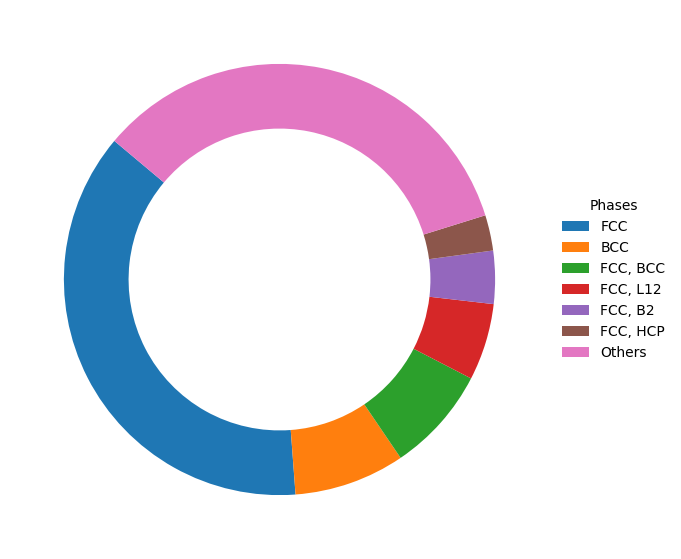

In [68]:
import matplotlib.pyplot as plt

# Combine phases with count smaller than 100 into 'Others'
phase_counts_filtered = phase_counts.copy()
phase_counts_filtered[phase_counts_filtered < 100] = 0
phase_counts_filtered['Others'] = phase_counts[phase_counts < 100].sum()

# Remove zero counts
phase_counts_filtered = phase_counts_filtered[phase_counts_filtered > 0]

# Plot the hollow pie chart
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(phase_counts_filtered, wedgeprops=dict(width=0.3), startangle=140)

# Add a legend to the right side without a box
ax.legend(wedges, phase_counts_filtered.index, title="Phases", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), frameon=False)

plt.show()

C:\Users\Soike\AppData\Local\Temp\ipykernel_46964\1312945957.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tensile_df['color'] = tensile_df['phase'].apply(lambda x: colors['FCC'] if x and 'FCC' in x else (colors['BCC'] if x and 'BCC' in x else colors['Others']))


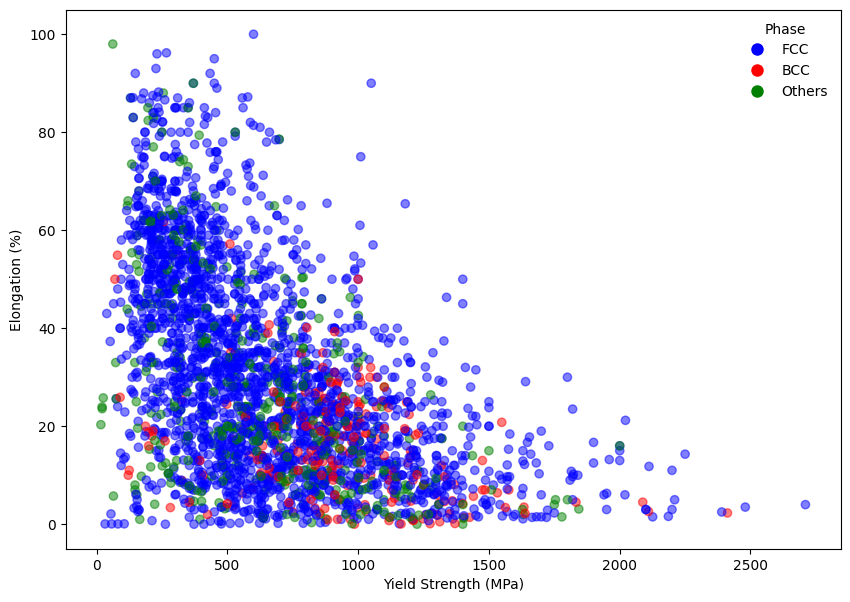

In [77]:
import json

import matplotlib.pyplot as plt
import pandas as pd

with open('heas_1567_dist_expanded.json', 'r', encoding='utf-8') as f:
    expanded_results_filtered = json.load(f)

df = pd.DataFrame(expanded_results_filtered)
df_unchanged = df.copy()

# Exclude values with strain more than 100% or yield strength more than 3000 MPa
df = df[(df['strain'] <= 100) & (df['ys'] <= 3000)]

# Filter the dataframe for tensile properties and non-null yield strength
tensile_df = df[(df['test_type'] == 'tensile') & (df['ys'].notnull())]

# Define colors for different phases
colors = {'FCC': 'blue', 'BCC': 'red', 'Others': 'green'}

# Assign colors based on phase, handling None values
tensile_df['color'] = tensile_df['phase'].apply(lambda x: colors['FCC'] if x and 'FCC' in x else (colors['BCC'] if x and 'BCC' in x else colors['Others']))

# Plot the scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(tensile_df['ys'], tensile_df['strain'], c=tensile_df['color'], alpha=0.5)

# Add labels and title
plt.xlabel('Yield Strength (MPa)')
plt.ylabel('Elongation (%)')
# plt.title('Scatter Plot of Yield Strength vs Strain for Tensile Properties')

# Add legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors['FCC'], markersize=10, label='FCC'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors['BCC'], markersize=10, label='BCC'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors['Others'], markersize=10, label='Others')]
plt.legend(handles=handles, title='Phase', frameon=False)

plt.show()

In [72]:
# Filter out rows where ys is greater than 3000 and only consider tensile strength
filtered_df = df_unchanged[(df_unchanged['ys'] <= 3000) & (df_unchanged['test_type'] == 'tensile') & (df_unchanged['test_temperature'] == '25 °C')]

# Sort the dataframe by ultimate tensile strength (uts) in descending order
sorted_df = filtered_df.sort_values(by='ys', ascending=False)

# Drop duplicate compositions, keeping the row with the highest uts
unique_compositions_df = sorted_df.drop_duplicates(subset='composition_cleaned', keep='first')

# Select the top 50 rows
top_50_df = unique_compositions_df.head(50)

# Display the top 50 compositions and their corresponding tensile strength
top_50_df[['composition_cleaned', 'ys']]

,composition_cleaned,ys
3532,Al0.1459854 Co1 Cr0.4379562 Fe0.4379562 Mo0.04...,2480.00
240,Co0.41666667 Fe1 Mo0.08333333 Ni0.16666667,2412.00
576,Co1 Cr1 Ni1 V1,2390.00
2504,Hf1 Nb1 Ta1 Zr1,2310.00
4299,Co1 Cr0.4379562 Fe0.4379562 Ni0.70072993,2200.00
4206,Al0.15 Co0.5 Cr0.5 Fe0.5 Ni1 Ti0.125,2200.00
491,W-Co1 Cr1 Fe1 Mn1 Ni1,2186.00
4224,Co1 Cr1 Ni1 Ta0.04081633,2150.00
3936,Al0.2 Cr0.36 Fe0.4 Ni1 V0.08,2100.00
2204,Hf1 Nb1 Ta1 Ti1 Zr1,2088.00


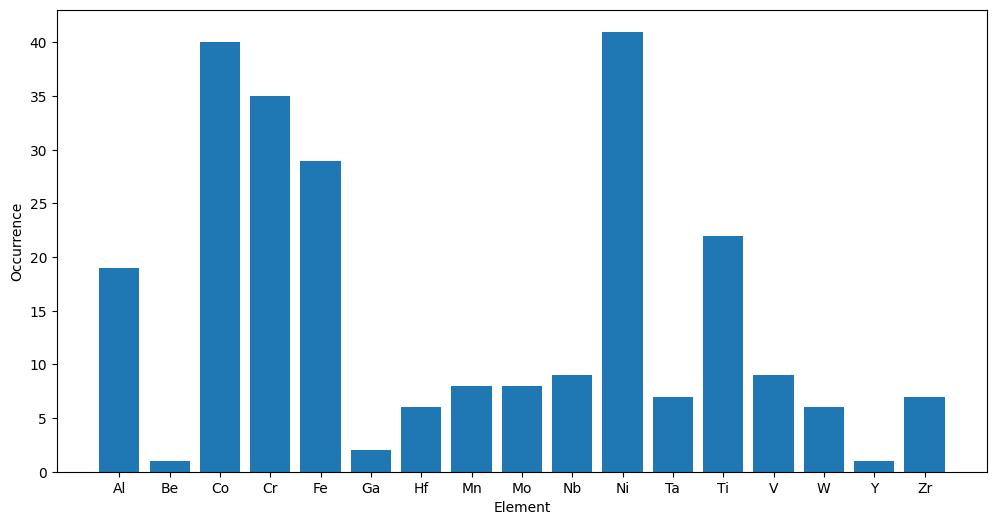

In [78]:
from collections import Counter
from pymatgen.core.composition import Composition
from pymatgen.core.periodic_table import Element

import matplotlib.pyplot as plt

# Function to get metal elements from composition
def get_metal_elements(composition):
    elements = []
    for part in composition.split('-'):
        comp = Composition(part)
        elements.extend([el.symbol for el in comp.elements if Element(el.symbol).is_metal])
    return elements

# Get metal elements from top-50 compositions
metal_elements = []
for comp in top_50_df['composition_cleaned']:
    metal_elements.extend(get_metal_elements(comp))

# Count occurrences of each metal element
metal_element_counts = Counter(metal_elements)

# Sort elements alphabetically
sorted_elements = sorted(metal_element_counts.items())

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar([el[0] for el in sorted_elements], [el[1] for el in sorted_elements])
plt.xlabel('Element')
plt.ylabel('Occurrence')
# plt.title('Occurrences of Metal Elements in Top-50 Yield Strength Alloys')
plt.show()

In [6]:
import matplotlib.pyplot as plt

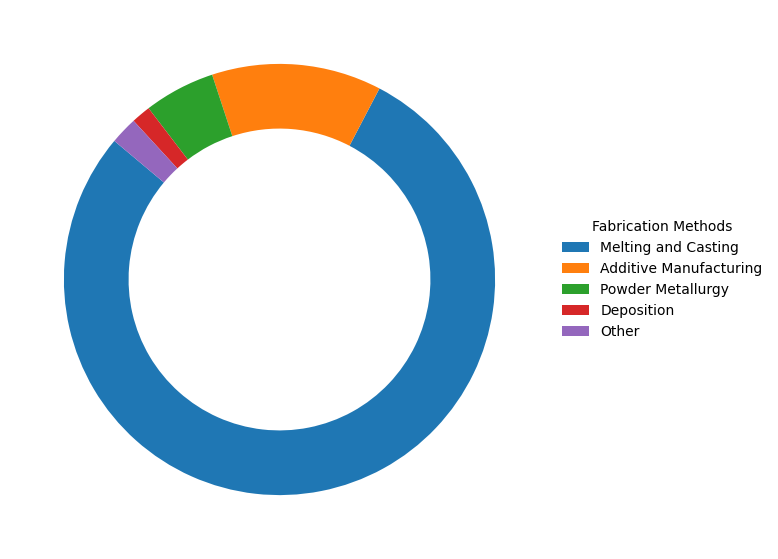

In [84]:
# Rename 'melting casting' to 'Melting and Casting'
df_unchanged['fabrication_cleaned'] = df_unchanged['fabrication_cleaned'].replace({
    'melting casting': 'Melting and Casting',
    'additive manufacturing': 'Additive Manufacturing',
    'powder metallurgy': 'Powder Metallurgy',
    'deposition': 'Deposition',
    'other': 'Other'
})

# Count the different fabrication_cleaned processes
fabrication_counts = df_unchanged['fabrication_cleaned'].value_counts()

# Combine fabrication methods with count smaller than 10 into 'Others'
fabrication_counts_filtered = fabrication_counts.copy()
fabrication_counts_filtered[fabrication_counts_filtered < 10] = 0
fabrication_counts_filtered['Others'] = fabrication_counts[fabrication_counts < 10].sum()

# Remove zero counts
fabrication_counts_filtered = fabrication_counts_filtered[fabrication_counts_filtered > 0]

# Reorder the list as specified
order = ['Melting and Casting', 'Additive Manufacturing', 'Powder Metallurgy', 'Deposition', 'Other']
fabrication_counts_filtered = fabrication_counts_filtered.reindex(order)

# Plot the hollow pie chart
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(fabrication_counts_filtered, wedgeprops=dict(width=0.3), startangle=140)

# Add a legend to the right side
ax.legend(wedges, fabrication_counts_filtered.index, title="Fabrication Methods", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), frameon=False)

# plt.title('Proportion of Different Fabrication Methods')
plt.show()

In [85]:
df_unchanged

,composition,composition_cleaned,phase,ys,uts,strain,fabrication,fabrication_cleaned,thermal_mechanical_processings,annealed,rolled,homogenized,aged,test_type,test_temperature,doi
0,CoCrFeMnNi,Co1 Cr1 Fe1 Mn1 Ni1,FCC,NaN,NaN,NaN,None,None,None,False,False,False,False,tensile,25 °C,10.1002/adem.202001514
1,CoCrFeNi,Co1 Cr1 Fe1 Ni1,FCC,NaN,NaN,NaN,None,None,None,False,False,False,False,tensile,25 °C,10.1002/adem.202001514
2,Ti65(AlCrNb)35,Al0.17948718 Cr0.17948718 Nb0.17948718 Ti1,BCC,NaN,NaN,NaN,arc melting,Melting and Casting,None,False,False,False,False,compressive,25 °C,10.1002/adem.202001514
3,Fe40Mn40Co10Cr10,Co0.25 Cr0.25 Fe1 Mn1,None,NaN,NaN,NaN,vacuum induction melting,Melting and Casting,cold rolled to 70% reduction | homogenized at ...,False,True,True,False,tensile,25 °C,10.1002/adem.201801266
4,Al0.1Cr0.4CuFe0.4MnNi,Al0.1 Cr0.4 Cu1 Fe0.4 Mn1 Ni1,"FCC, BCC",NaN,600.0,30.0,vacuum arc-melting,Melting and Casting,None,False,False,False,False,tensile,25 °C,10.1002/adem.201600726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,Fe50Mn30Co10Cr10,Co0.2 Cr0.2 Fe1 Mn0.6,"FCC, HCP",NaN,NaN,65.0,vacuum induction melting,Melting and Casting,annealed at 900 °C | water quenched,True,False,False,False,tensile,25 °C,10.1016/j.scriptamat.2017.09.013
4808,Fe50Mn30Co10Cr10,Co0.2 Cr0.2 Fe1 Mn0.6,"FCC, HCP",NaN,NaN,NaN,vacuum induction melting,Melting and Casting,annealed at 850 °C for 20 min | furnace cooled,True,False,False,False,tensile,25 °C,10.1016/j.scriptamat.2017.09.013
4809,Al0.3CoFeNi,Al0.3 Co1 Fe1 Ni1,"FCC, L12, BCC, B2",1074.0,1302.0,8.0,arc melting,Melting and Casting,homogenized at 1250 °C for 30 min | cold rolle...,True,True,True,False,tensile,25 °C,10.1038/s41598-020-61538-6
4810,Al0.3CoFeNi,Al0.3 Co1 Fe1 Ni1,FCC,457.0,852.0,76.0,arc melting,Melting and Casting,homogenized at 1250 °C for 30 min | cold rolle...,False,True,True,False,tensile,25 °C,10.1038/s41598-020-61538-6


In [13]:
df_unchanged

,composition,composition_cleaned,phase,ys,uts,strain,fabrication,fabrication_cleaned,thermal_mechanical_processings,annealed,rolled,homogenized,aged,test_type,test_temperature,doi
0,CoCrFeMnNi,Co1 Cr1 Fe1 Mn1 Ni1,FCC,NaN,NaN,NaN,None,None,None,False,False,False,False,tensile,25 °C,10.1002/adem.202001514
1,CoCrFeNi,Co1 Cr1 Fe1 Ni1,FCC,NaN,NaN,NaN,None,None,None,False,False,False,False,tensile,25 °C,10.1002/adem.202001514
2,Ti65(AlCrNb)35,Al0.17948718 Cr0.17948718 Nb0.17948718 Ti1,BCC,NaN,NaN,NaN,arc melting,melting casting,None,False,False,False,False,compressive,25 °C,10.1002/adem.202001514
3,Fe40Mn40Co10Cr10,Co0.25 Cr0.25 Fe1 Mn1,None,NaN,NaN,NaN,vacuum induction melting,melting casting,cold rolled to 70% reduction | homogenized at ...,False,True,True,False,tensile,25 °C,10.1002/adem.201801266
4,Al0.1Cr0.4CuFe0.4MnNi,Al0.1 Cr0.4 Cu1 Fe0.4 Mn1 Ni1,"FCC, BCC",NaN,600.0,30.0,vacuum arc-melting,melting casting,None,False,False,False,False,tensile,25 °C,10.1002/adem.201600726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,Fe50Mn30Co10Cr10,Co0.2 Cr0.2 Fe1 Mn0.6,"FCC, HCP",NaN,NaN,65.0,vacuum induction melting,melting casting,annealed at 900 °C | water quenched,True,False,False,False,tensile,25 °C,10.1016/j.scriptamat.2017.09.013
4808,Fe50Mn30Co10Cr10,Co0.2 Cr0.2 Fe1 Mn0.6,"FCC, HCP",NaN,NaN,NaN,vacuum induction melting,melting casting,annealed at 850 °C for 20 min | furnace cooled,True,False,False,False,tensile,25 °C,10.1016/j.scriptamat.2017.09.013
4809,Al0.3CoFeNi,Al0.3 Co1 Fe1 Ni1,"FCC, L12, BCC, B2",1074.0,1302.0,8.0,arc melting,melting casting,homogenized at 1250 °C for 30 min | cold rolle...,True,True,True,False,tensile,25 °C,10.1038/s41598-020-61538-6
4810,Al0.3CoFeNi,Al0.3 Co1 Fe1 Ni1,FCC,457.0,852.0,76.0,arc melting,melting casting,homogenized at 1250 °C for 30 min | cold rolle...,False,True,True,False,tensile,25 °C,10.1038/s41598-020-61538-6


In [15]:
# Group by 'composition_cleaned' and get the groups
grouped = df.groupby('composition_cleaned')

# Iterate through the groups and print the rows with the same 'composition_cleaned'
for name, group in grouped:
    if len(group) > 5:
        print(f"Composition Cleaned: {name}")
        print(group)
        print("\n")

Composition Cleaned: Al0.08 Co1 Cr1 Fe1 La0.008 Mn1 Ni1
                  composition                 composition_cleaned   phase  \
4103  La0.008Al0.08FeCoCrNiMn  Al0.08 Co1 Cr1 Fe1 La0.008 Mn1 Ni1  FCC, σ   
4104  La0.008Al0.08FeCoCrNiMn  Al0.08 Co1 Cr1 Fe1 La0.008 Mn1 Ni1  FCC, σ   
4105  La0.008Al0.08FeCoCrNiMn  Al0.08 Co1 Cr1 Fe1 La0.008 Mn1 Ni1  FCC, σ   
4106  La0.008Al0.08FeCoCrNiMn  Al0.08 Co1 Cr1 Fe1 La0.008 Mn1 Ni1  FCC, σ   
4107  La0.008Al0.08FeCoCrNiMn  Al0.08 Co1 Cr1 Fe1 La0.008 Mn1 Ni1  FCC, σ   
4108  La0.008Al0.08FeCoCrNiMn  Al0.08 Co1 Cr1 Fe1 La0.008 Mn1 Ni1  FCC, σ   
4109  La0.008Al0.08FeCoCrNiMn  Al0.08 Co1 Cr1 Fe1 La0.008 Mn1 Ni1  FCC, σ   

          ys     uts  strain                         fabrication  \
4103   204.0   342.0    53.9  medium-frequency induction melting   
4104  1009.0  1177.0    11.1  medium-frequency induction melting   
4105  1028.0  1248.0    10.1  medium-frequency induction melting   
4106  1255.0  1403.0     9.1  medium-frequency inductio

In [43]:
df_cleaned = df_unchanged.dropna(subset=['ys'])[df_unchanged['ys'] < 3000]
melting_casting_annealed_ys_values = df_cleaned[(df_cleaned['fabrication_cleaned'] == 'melting casting') & (df_cleaned['aged'] == True) & (df_cleaned['ys'].notnull())]['ys']
print(melting_casting_annealed_ys_values.size)
melting_casting_annealed_ys_average = melting_casting_annealed_ys_values.mean()
melting_casting_annealed_ys_average

303


C:\Users\Soike\AppData\Local\Temp\ipykernel_46964\1192487676.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned = df_unchanged.dropna(subset=['ys'])[df_unchanged['ys'] < 3000]


796.0444224422442

In [45]:
melting_casting_annealed_ys_values = df_cleaned[(df_cleaned['fabrication_cleaned'] == 'melting casting') & (df_cleaned['aged'] == False) & (df_cleaned['ys'].notnull())]['ys']
melting_casting_annealed_ys_average = melting_casting_annealed_ys_values.mean()
print(melting_casting_annealed_ys_values.size)
melting_casting_annealed_ys_average

2482


667.4087366639807

In [30]:
df_unchanged[df_unchanged['ys'] < 3000].sort_values('ys', ascending=False)[:10]

,composition,composition_cleaned,phase,ys,uts,strain,fabrication,fabrication_cleaned,thermal_mechanical_processings,annealed,rolled,homogenized,aged,test_type,test_temperature,doi
1942,CoCrFeNi,Co1 Cr1 Fe1 Ni1,FCC,2954.0,NaN,NaN,pulsed DC magnetron sputtering,deposition,None,False,False,False,False,compressive,25 °C,10.1016/j.surfcoat.2022.128191
1890,CoCrFeNi,Co1 Cr1 Fe1 Ni1,"FCC, BCC",2710.0,2810.0,4.0,powder metallurgy,powder metallurgy,high-pressure torsion at 5 GPa for four turns ...,True,False,False,False,tensile,-248 °C,10.1016/j.scriptamat.2022.114631
3733,Co0.5FeNiCrTi0.5,Co0.5 Cr1 Fe1 Ni1 Ti0.5,"FCC, sigma",2650.0,2690.0,10.0,mechanical alloying and spark plasma sintering,powder metallurgy,consolidated at 1273K for 8min at 30MPa,False,False,False,False,compressive,25 °C,10.1016/j.matdes.2012.08.048
2179,CoFeNiVTi0.5,Co1 Fe1 Ni1 Ti0.5 V1,"BCC, (Ni, Co)3Ti",2644.0,NaN,2.3,vacuum arc-melting,melting casting,None,False,False,False,False,compressive,25 °C,10.1007/s11665-023-08963-6
3532,Co34.25Cr15Ni24Fe15Al5Ti3W1.5Mo1.5Nb0.75,Al0.1459854 Co1 Cr0.4379562 Fe0.4379562 Mo0.04...,"FCC, LI2-γ′",2480.0,NaN,3.5,arc-melting,melting casting,homogenized at 1200 °C for 24 h | cold-rolled ...,True,True,True,True,tensile,25 °C,10.1016/j.jmst.2023.08.032
1232,AlCoCrFeNiNb0.5,Al1 Co1 Cr1 Fe1 Nb0.5 Ni1,Multiphase,2473.0,3170.0,NaN,Arc melting,melting casting,None,False,False,False,False,compressive,25 °C,10.1016/j.matchemphys.2024.130091
240,Fe60Co25Ni10Mo5,Co0.41666667 Fe1 Mo0.08333333 Ni0.16666667,BCC,2412.0,2507.0,2.3,vacuum induction melting,melting casting,homogenized at 1100 °C for 6 h | hot rolled at...,False,True,True,True,tensile,25 °C,10.1016/j.actamat.2023.118810
576,NiCrCoV,Co1 Cr1 Ni1 V1,"BCC, FCC",2390.0,2690.0,2.5,laser cladding,deposition,None,False,False,False,False,tensile,25 °C,10.1016/j.jallcom.2017.09.233
2520,Mo0.5VNbTiCr2,Cr1 Mo0.25 Nb0.5 Ti0.5 V0.5,None,2311.0,NaN,NaN,None,None,None,False,False,False,False,compressive,25 °C,10.1016/j.apmt.2024.102164
2504,ZrNbHfTa,Hf1 Nb1 Ta1 Zr1,None,2310.0,NaN,NaN,None,None,None,False,False,False,False,tensile,25 °C,10.1016/j.apmt.2024.102164


In [46]:
df_cleaned[df_cleaned['fabrication_cleaned'] == 'melting casting']

,composition,composition_cleaned,phase,ys,uts,strain,fabrication,fabrication_cleaned,thermal_mechanical_processings,annealed,rolled,homogenized,aged,test_type,test_temperature,doi
6,MnFeCoNiCu,Co1 Cu1 Fe1 Mn1 Ni1,FCC,361.0,628.0,32.0,vacuum induction melting,melting casting,None,False,False,False,False,tensile,25 °C,10.1002/adem.202000848
7,MnFeNiCu,Cu1 Fe1 Mn1 Ni1,FCC,401.0,NaN,NaN,vacuum induction melting,melting casting,None,False,False,False,False,tensile,25 °C,10.1002/adem.202000848
9,V10Cr15Mn5Fe35Co10Ni25,Co0.28571429 Cr0.42857143 Fe1 Mn0.14285714 Ni0...,FCC,430.0,720.0,48.1,vacuum induction melting,melting casting,homogenized at 1100 °C for 6 h | cold rolled w...,True,True,True,False,tensile,25 °C,10.1002/adem.201900587
10,V10Cr15Mn5Fe35Co10Ni25,Co0.28571429 Cr0.42857143 Fe1 Mn0.14285714 Ni0...,FCC,230.0,532.0,57.6,vacuum induction melting,melting casting,homogenized at 1100 °C for 6 h | cold rolled w...,True,True,True,False,tensile,25 °C,10.1002/adem.201900587
11,V10Cr15Mn5Fe35Co10Ni25,Co0.28571429 Cr0.42857143 Fe1 Mn0.14285714 Ni0...,FCC,1120.0,1447.0,15.9,vacuum induction melting,melting casting,homogenized at 1100 °C for 6 h | cold rolled w...,True,True,True,False,tensile,25 °C,10.1002/adem.201900587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,Ni48.3Co16.9Al10.2Fe8.9Cr7.4Ti5.8Nb1.2Mo0.9W0.4,Al0.21118012 Co0.34989648 Cr0.15320911 Fe0.184...,"FCC, L12",993.0,NaN,20.0,Bridgman process,melting casting,solution heat treated from room temperature to...,False,False,False,False,tensile,25 °C,10.1038/s41598-020-69257-8
4799,Ni48.3Co16.9Al10.2Fe8.9Cr7.4Ti5.8Nb1.2Mo0.9W0.4,Al0.21118012 Co0.34989648 Cr0.15320911 Fe0.184...,"FCC, L12",1023.0,NaN,20.0,Bridgman process,melting casting,solution heat treated from room temperature to...,False,False,False,False,tensile,750 °C,10.1038/s41598-020-69257-8
4809,Al0.3CoFeNi,Al0.3 Co1 Fe1 Ni1,"FCC, L12, BCC, B2",1074.0,1302.0,8.0,arc melting,melting casting,homogenized at 1250 °C for 30 min | cold rolle...,True,True,True,False,tensile,25 °C,10.1038/s41598-020-61538-6
4810,Al0.3CoFeNi,Al0.3 Co1 Fe1 Ni1,FCC,457.0,852.0,76.0,arc melting,melting casting,homogenized at 1250 °C for 30 min | cold rolle...,False,True,True,False,tensile,25 °C,10.1038/s41598-020-61538-6


In [50]:
melting_casting_aged_ys_values = df_cleaned[(df_cleaned['fabrication_cleaned'] == 'melting casting') & (df_cleaned['aged'] == True) & (df_cleaned['ys'].notnull())]
melting_casting_aged_ys_values['thermal_mechanical_processings']

44      homogenized at 1150 °C for 2 h | cold rolled w...
116     homogenized at 1200 °C for 8 h | cold rolled a...
132     homogenized at 1220 °C for 20 h | aged at 900 ...
133     homogenized at 1220 °C for 20 h | aged at 900 ...
140     homogenized at 1220 °C for 20 h | aged at 900 ...
                              ...                        
4662    solution-treated at 1200 °C for 2 h | cold rol...
4766    homogenized at 1200 °C for 2 h | hot-rolled at...
4768    homogenized at 1100 °C for 2 h | hot rolled at...
4770    solution-treated at 1200 °C for 24 h | water q...
4771    solution-treated at 1200 °C for 24 h | water q...
Name: thermal_mechanical_processings, Length: 303, dtype: object

In [51]:
melting_casting_aged_ys_values_u = df_cleaned[(df_cleaned['fabrication_cleaned'] == 'melting casting') & (df_cleaned['aged'] == False) & (df_cleaned['ys'].notnull())]
melting_casting_aged_ys_values_u

,composition,composition_cleaned,phase,ys,uts,strain,fabrication,fabrication_cleaned,thermal_mechanical_processings,annealed,rolled,homogenized,aged,test_type,test_temperature,doi
6,MnFeCoNiCu,Co1 Cu1 Fe1 Mn1 Ni1,FCC,361.0,628.0,32.0,vacuum induction melting,melting casting,None,False,False,False,False,tensile,25 °C,10.1002/adem.202000848
7,MnFeNiCu,Cu1 Fe1 Mn1 Ni1,FCC,401.0,NaN,NaN,vacuum induction melting,melting casting,None,False,False,False,False,tensile,25 °C,10.1002/adem.202000848
9,V10Cr15Mn5Fe35Co10Ni25,Co0.28571429 Cr0.42857143 Fe1 Mn0.14285714 Ni0...,FCC,430.0,720.0,48.1,vacuum induction melting,melting casting,homogenized at 1100 °C for 6 h | cold rolled w...,True,True,True,False,tensile,25 °C,10.1002/adem.201900587
10,V10Cr15Mn5Fe35Co10Ni25,Co0.28571429 Cr0.42857143 Fe1 Mn0.14285714 Ni0...,FCC,230.0,532.0,57.6,vacuum induction melting,melting casting,homogenized at 1100 °C for 6 h | cold rolled w...,True,True,True,False,tensile,25 °C,10.1002/adem.201900587
11,V10Cr15Mn5Fe35Co10Ni25,Co0.28571429 Cr0.42857143 Fe1 Mn0.14285714 Ni0...,FCC,1120.0,1447.0,15.9,vacuum induction melting,melting casting,homogenized at 1100 °C for 6 h | cold rolled w...,True,True,True,False,tensile,25 °C,10.1002/adem.201900587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,Ni48.3Co16.9Al10.2Fe8.9Cr7.4Ti5.8Nb1.2Mo0.9W0.4,Al0.21118012 Co0.34989648 Cr0.15320911 Fe0.184...,"FCC, L12",993.0,NaN,20.0,Bridgman process,melting casting,solution heat treated from room temperature to...,False,False,False,False,tensile,25 °C,10.1038/s41598-020-69257-8
4799,Ni48.3Co16.9Al10.2Fe8.9Cr7.4Ti5.8Nb1.2Mo0.9W0.4,Al0.21118012 Co0.34989648 Cr0.15320911 Fe0.184...,"FCC, L12",1023.0,NaN,20.0,Bridgman process,melting casting,solution heat treated from room temperature to...,False,False,False,False,tensile,750 °C,10.1038/s41598-020-69257-8
4809,Al0.3CoFeNi,Al0.3 Co1 Fe1 Ni1,"FCC, L12, BCC, B2",1074.0,1302.0,8.0,arc melting,melting casting,homogenized at 1250 °C for 30 min | cold rolle...,True,True,True,False,tensile,25 °C,10.1038/s41598-020-61538-6
4810,Al0.3CoFeNi,Al0.3 Co1 Fe1 Ni1,FCC,457.0,852.0,76.0,arc melting,melting casting,homogenized at 1250 °C for 30 min | cold rolle...,False,True,True,False,tensile,25 °C,10.1038/s41598-020-61538-6


C:\Users\Soike\AppData\Local\Temp\ipykernel_46964\809253645.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['Aged', 'Unaged'])


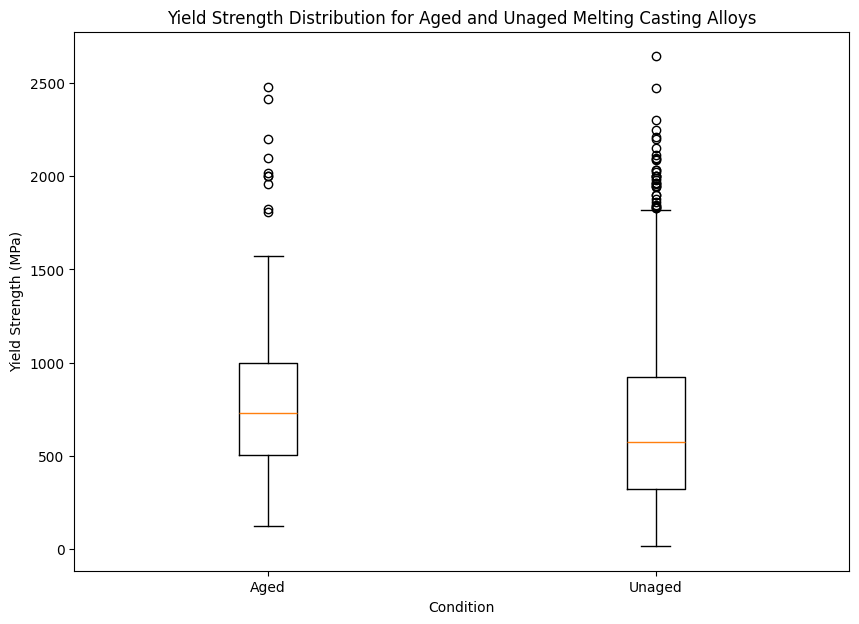

In [52]:
import matplotlib.pyplot as plt

# Create a list of data for the box plot
data = [melting_casting_aged_ys_values['ys'], melting_casting_aged_ys_values_u['ys']]

# Create the box plot
plt.figure(figsize=(10, 7))
plt.boxplot(data, labels=['Aged', 'Unaged'])

# Add labels and title
plt.xlabel('Condition')
plt.ylabel('Yield Strength (MPa)')
plt.title('Yield Strength Distribution for Aged and Unaged Melting Casting Alloys')

# Show the plot
plt.show()

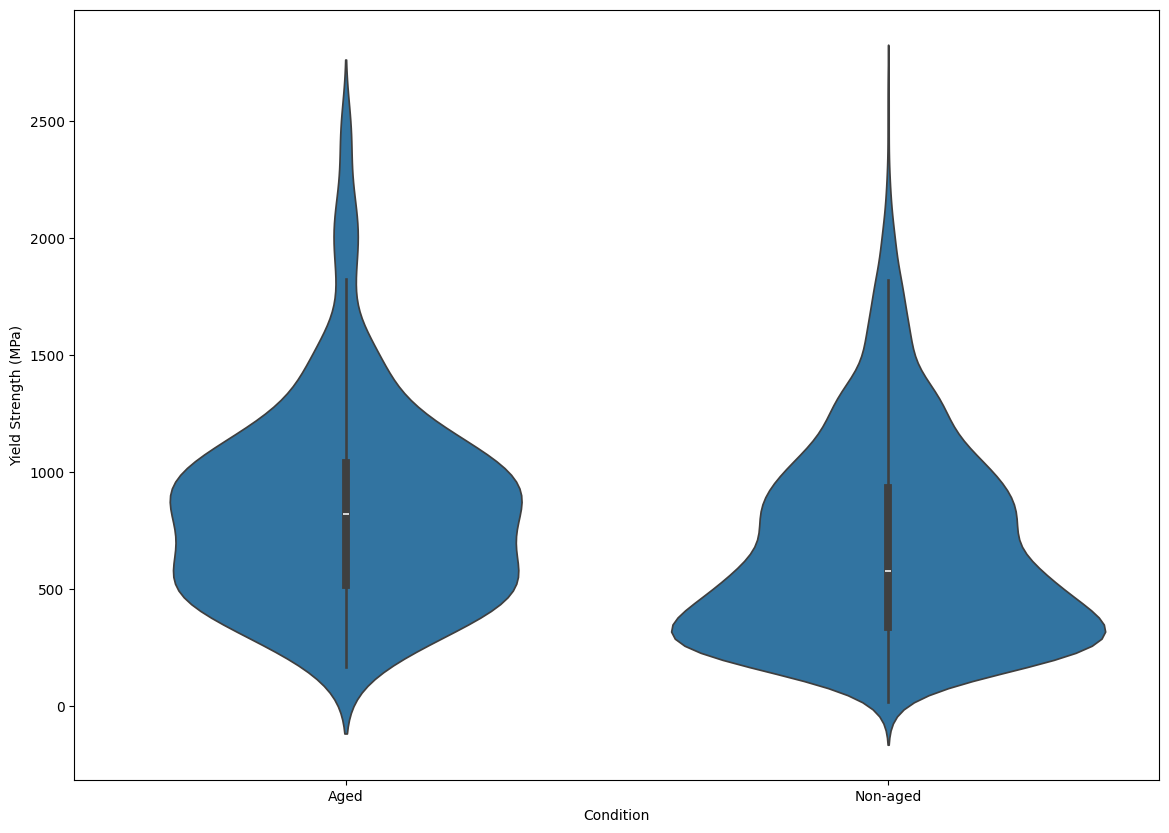

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for test_temperature = '25 °C'
melting_casting_aged_ys_values_25C = melting_casting_aged_ys_values[melting_casting_aged_ys_values['test_temperature'] == '25 °C']
melting_casting_aged_ys_values_u_25C = melting_casting_aged_ys_values_u[melting_casting_aged_ys_values_u['test_temperature'] == '25 °C']

# Create a DataFrame for the violin plot
data = pd.DataFrame({
    'Yield Strength (MPa)': pd.concat([melting_casting_aged_ys_values_25C['ys'], melting_casting_aged_ys_values_u_25C['ys']]),
    'Condition': ['Aged'] * len(melting_casting_aged_ys_values_25C) + ['Non-aged'] * len(melting_casting_aged_ys_values_u_25C)
})

# Create the violin plot
plt.figure(figsize=(14, 10))  # Adjusted figure size
sns.violinplot(x='Condition', y='Yield Strength (MPa)', data=data)

# Add labels and title
plt.xlabel('Condition')
plt.ylabel('Yield Strength (MPa)')
# plt.title('Yield Strength Distribution for Aged and Unaged Melting Casting Alloys at 25 °C')

# Show the plot
plt.show()

In [59]:
distinctive_alloy_compositions = df_unchanged['composition_cleaned'].nunique()
distinctive_alloy_compositions

1564

In [60]:
df_unchanged

,composition,composition_cleaned,phase,ys,uts,strain,fabrication,fabrication_cleaned,thermal_mechanical_processings,annealed,rolled,homogenized,aged,test_type,test_temperature,doi
0,CoCrFeMnNi,Co1 Cr1 Fe1 Mn1 Ni1,FCC,NaN,NaN,NaN,None,None,None,False,False,False,False,tensile,25 °C,10.1002/adem.202001514
1,CoCrFeNi,Co1 Cr1 Fe1 Ni1,FCC,NaN,NaN,NaN,None,None,None,False,False,False,False,tensile,25 °C,10.1002/adem.202001514
2,Ti65(AlCrNb)35,Al0.17948718 Cr0.17948718 Nb0.17948718 Ti1,BCC,NaN,NaN,NaN,arc melting,melting casting,None,False,False,False,False,compressive,25 °C,10.1002/adem.202001514
3,Fe40Mn40Co10Cr10,Co0.25 Cr0.25 Fe1 Mn1,None,NaN,NaN,NaN,vacuum induction melting,melting casting,cold rolled to 70% reduction | homogenized at ...,False,True,True,False,tensile,25 °C,10.1002/adem.201801266
4,Al0.1Cr0.4CuFe0.4MnNi,Al0.1 Cr0.4 Cu1 Fe0.4 Mn1 Ni1,"FCC, BCC",NaN,600.0,30.0,vacuum arc-melting,melting casting,None,False,False,False,False,tensile,25 °C,10.1002/adem.201600726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,Fe50Mn30Co10Cr10,Co0.2 Cr0.2 Fe1 Mn0.6,"FCC, HCP",NaN,NaN,65.0,vacuum induction melting,melting casting,annealed at 900 °C | water quenched,True,False,False,False,tensile,25 °C,10.1016/j.scriptamat.2017.09.013
4808,Fe50Mn30Co10Cr10,Co0.2 Cr0.2 Fe1 Mn0.6,"FCC, HCP",NaN,NaN,NaN,vacuum induction melting,melting casting,annealed at 850 °C for 20 min | furnace cooled,True,False,False,False,tensile,25 °C,10.1016/j.scriptamat.2017.09.013
4809,Al0.3CoFeNi,Al0.3 Co1 Fe1 Ni1,"FCC, L12, BCC, B2",1074.0,1302.0,8.0,arc melting,melting casting,homogenized at 1250 °C for 30 min | cold rolle...,True,True,True,False,tensile,25 °C,10.1038/s41598-020-61538-6
4810,Al0.3CoFeNi,Al0.3 Co1 Fe1 Ni1,FCC,457.0,852.0,76.0,arc melting,melting casting,homogenized at 1250 °C for 30 min | cold rolle...,False,True,True,False,tensile,25 °C,10.1038/s41598-020-61538-6
